GAN

In [25]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Dense,Reshape,Flatten,Dropout,BatchNormalization,Activation,LeakyReLU,UpSampling2D,Conv2D
from tensorflow.keras.models import Sequential,Model

import numpy as np
import matplotlib.pyplot as plt
import os


In [18]:
generator = Sequential()
generator.add(Dense(128*7*7,input_dim=100,activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7,7,128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64,kernel_size=5,padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1,kernel_size=5,padding='same',activation='tanh'))


In [19]:
discriminator = Sequential()
discriminator.add(Conv2D(64,kernel_size=5,strides=2,input_shape=(28,28,1),padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128,kernel_size=5,strides=2,padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer='adam')
discriminator.trainable=False

In [20]:
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput,dis_output)
gan.compile(loss='binary_crossentropy',optimizer='adam')
gan.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_6 (Sequential)   (None, 28, 28, 1)         865281    
                                                                 
 sequential_7 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


epoch:0 d_loss:0.5032 g_loss:1.4797
epoch:1 d_loss:0.5478 g_loss:1.5913
epoch:2 d_loss:0.3571 g_loss:1.7502
epoch:3 d_loss:0.2975 g_loss:2.2018
epoch:4 d_loss:0.4728 g_loss:1.5960
epoch:5 d_loss:0.4218 g_loss:1.6057
epoch:6 d_loss:0.4050 g_loss:1.8296
epoch:7 d_loss:0.3660 g_loss:2.0378
epoch:8 d_loss:0.5103 g_loss:1.5382
epoch:9 d_loss:0.4060 g_loss:2.0488
epoch:10 d_loss:0.4275 g_loss:1.6140
epoch:11 d_loss:0.4197 g_loss:2.1408
epoch:12 d_loss:0.4524 g_loss:1.6068
epoch:13 d_loss:0.5893 g_loss:1.6035
epoch:14 d_loss:0.3733 g_loss:2.0051
epoch:15 d_loss:0.3741 g_loss:2.1198
epoch:16 d_loss:0.3971 g_loss:2.0812
epoch:17 d_loss:0.4049 g_loss:2.0078
epoch:18 d_loss:0.4504 g_loss:1.3119
epoch:19 d_loss:0.4003 g_loss:1.6238
epoch:20 d_loss:0.5773 g_loss:1.5647
epoch:21 d_loss:0.4717 g_loss:1.9205
epoch:22 d_loss:0.6046 g_loss:1.7699
epoch:23 d_loss:0.5494 g_loss:1.8578
epoch:24 d_loss:0.5011 g_loss:1.4870
epoch:25 d_loss:0.5908 g_loss:1.3438
epoch:26 d_loss:0.6746 g_loss:1.1344
epoch:27 d_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


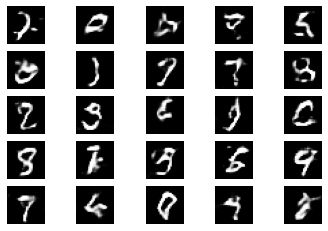

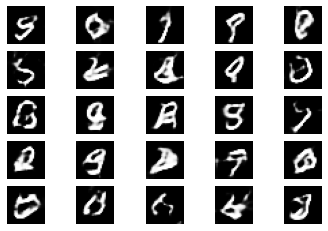

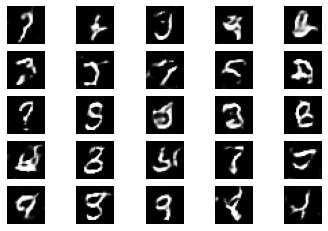

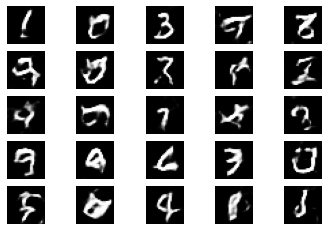

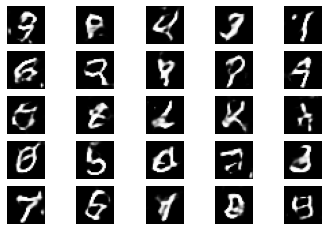

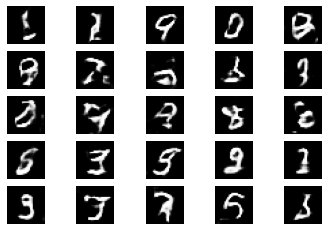

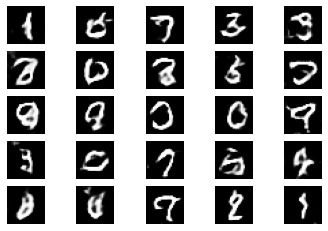

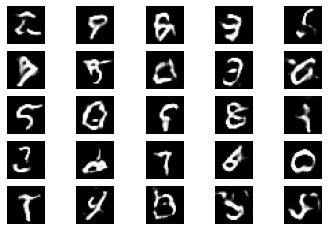

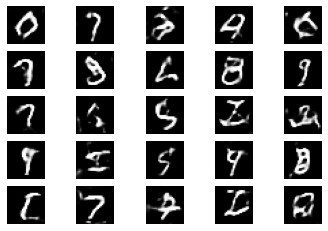

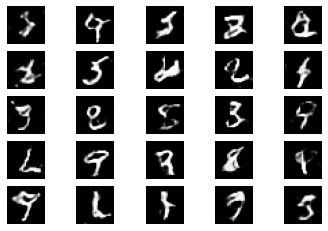

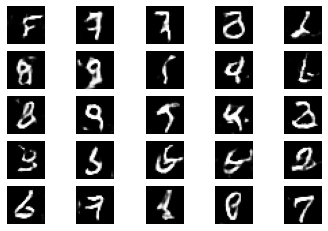

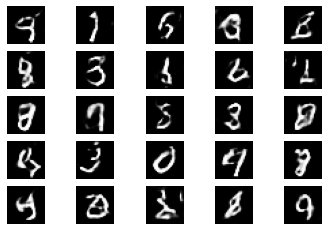

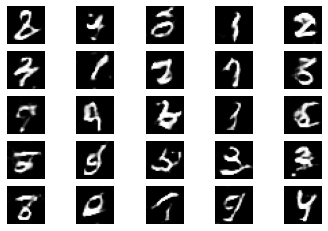

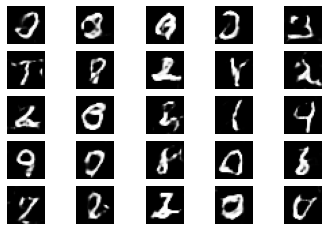

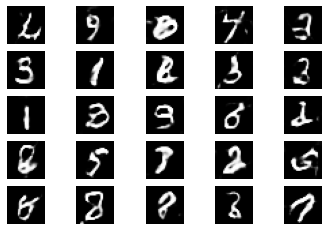

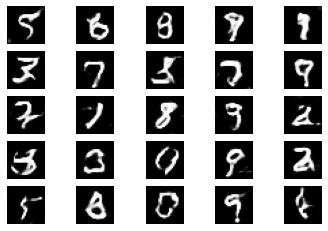

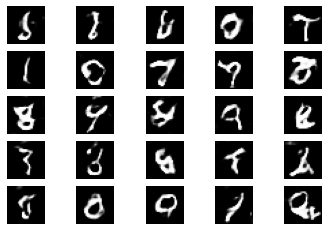

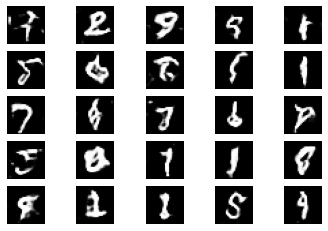

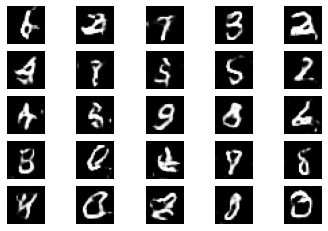

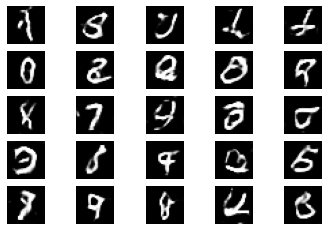

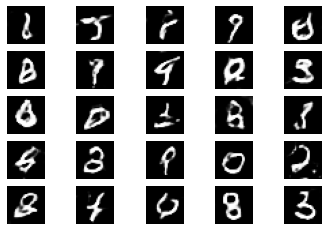

In [23]:
def gan_train(epoch,batch_size,saving_interval):

  (X_train, _),(_, _) = mnist.load_data()
  X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float64')

  X_train = (X_train-127.5)/127.5

  true = np.ones((batch_size,1))
  fake = np.zeros((batch_size,1))

  for i in range(epoch):
    idx = np.random.randint(0,X_train.shape[0],batch_size)
    imgs = X_train[idx]
    d_loss_real = discriminator.train_on_batch(imgs,true)

    noise = np.random.normal(0,1,(batch_size,100))
    gen_imgs = generator.predict(noise)
    d_loss_fake = discriminator.train_on_batch(gen_imgs,fake)

    d_loss = 0.5*np.add(d_loss_real,d_loss_fake)
    g_loss = gan.train_on_batch(noise,true)

    print('epoch:%d'%i,'d_loss:%.4f'%d_loss,'g_loss:%.4f'%g_loss)

    if i % saving_interval==0:
      noise = np.random.normal(0,1,(25,100))
      gen_imgs = generator.predict(noise)

      gen_imgs = 0.5*gen_imgs+0.5

      fig,axs = plt.subplots(5,5)
      count=0
      for j in range(5):
        for k in range(5):
          axs[j,k].imshow(gen_imgs[count,:,:,0],cmap='gray')
          axs[j,k].axis('off')
          count+=1
      # fig.savefig('gan_images/gan_mnist_%d.png'%i)
# os.mkdir('gen_images')
gan_train(2001,32,200)


오토인코더

In [27]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Dense,Reshape,Flatten,UpSampling2D,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential,Model

import numpy as np
import matplotlib.pyplot as plt

In [28]:
(X_train, _),(X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float64')/255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float64')/255

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_35 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_36 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 conv2d_37 (Conv2D)          (None, 4, 4, 8)         

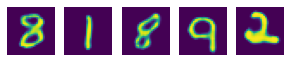

In [33]:
autoencoder = Sequential()

autoencoder.add(Conv2D(16,kernel_size=3,padding='same',input_shape=(28,28,1),activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2,padding='same'))
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2,padding='same'))
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',activation='relu',strides=2))

autoencoder.add(Conv2D(8,kernel_size=3,padding='same',activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16,kernel_size=3,activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1,kernel_size=3,padding='same',activation='sigmoid'))

autoencoder.summary()

autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(X_train,X_train,epochs=50,batch_size=128,validation_data=(X_test,X_test))

random_test = np.random.randint(X_test.shape[0],size=5)

ae_images = autoencoder.predict(X_test)

plt.figure(figsize=(7,2))

for i, image_idx in enumerate(random_test):
  ax = plt.subplot(2,7,i+1)
  plt.imshow(X_test[image_idx].reshape(28,28))
  ax.axis('off')
  plt.imshow(ae_images[image_idx].reshape(28,28))
  ax.axis('off')
plt.show()